# Nursery - full robustness evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings. filterwarnings('ignore')

## Horizontal subset attack

In [13]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_horizontal['misattribution'].loc[-1] = 
 

In [11]:
sns.set_theme()

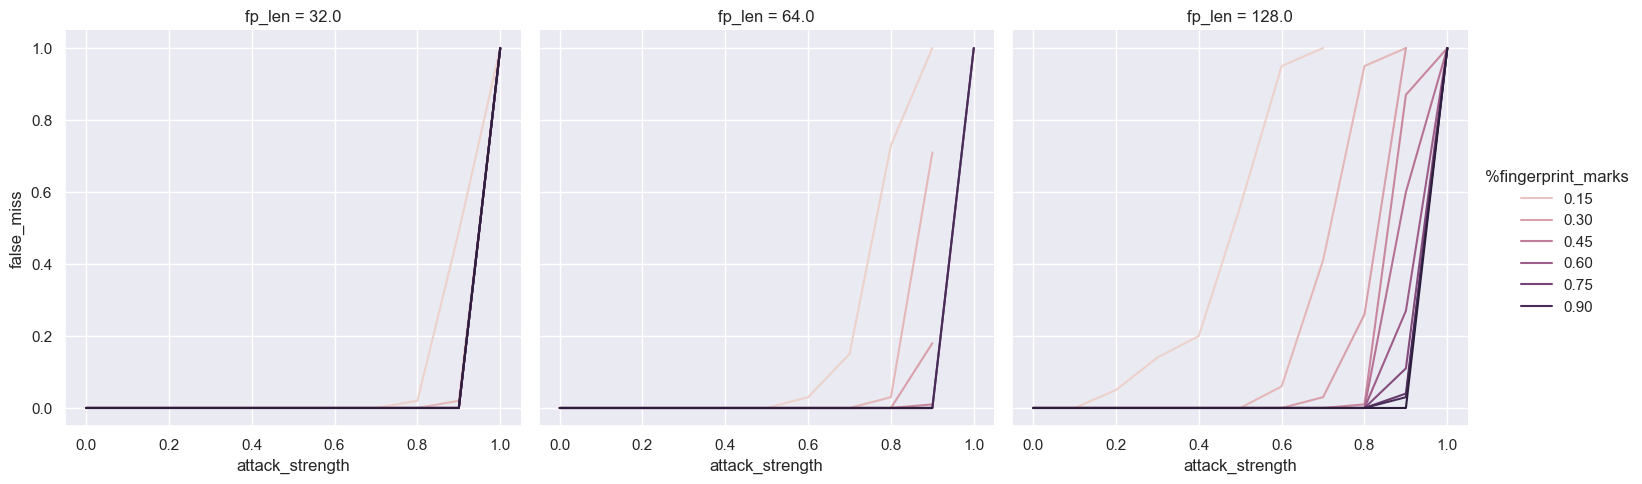

In [14]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_nursery.svg')
plt.savefig('figures/robustness_horizontal_nursery.png')

### Theorietical estimation

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [ ]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_est_nursery.svg')
plt.savefig('figures/robustness_horizontal_est_nursery.png')

### Comparison: empirical vs theoretical

In [ ]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

In [ ]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')

## Vertical attack

In [17]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


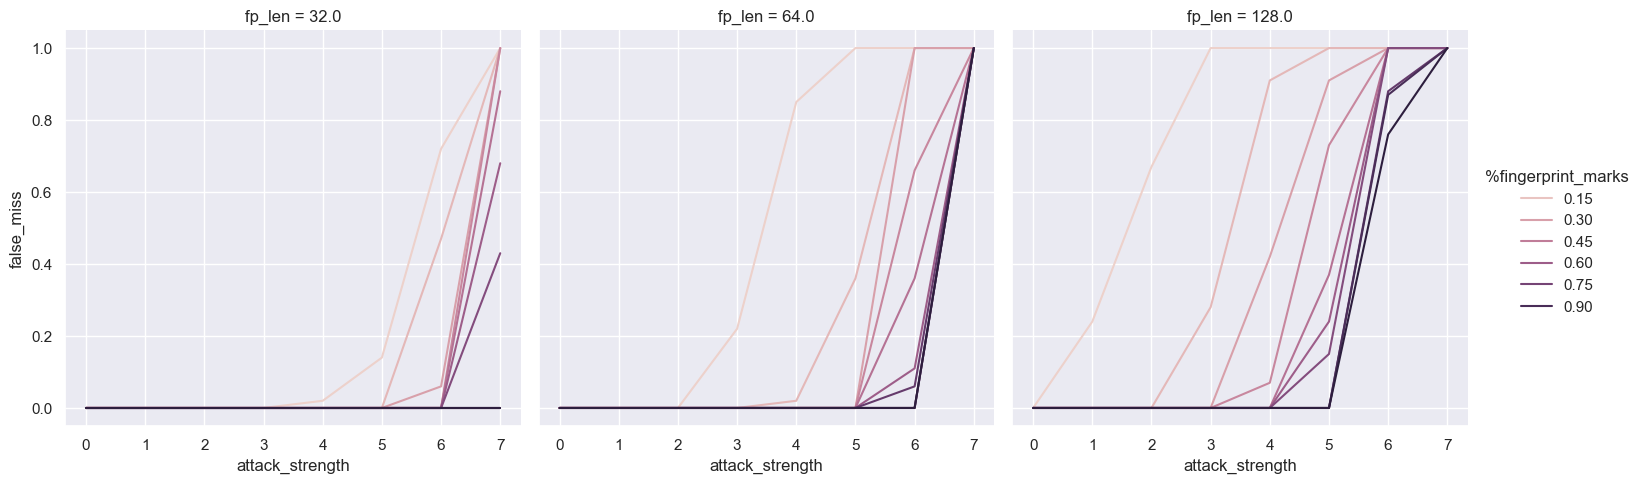

In [18]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_nursery.svg')
plt.savefig('figures/robustness_vertical_nursery.png')

## Flipping attack

In [23]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/nursery/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [22]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')

ValueError: Could not interpret value `%fingerprint_marks` for parameter `hue`

## Superset

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [ ]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

## Combination attack
Superset attack (horizontal subset + synthetic imputation) + flipping attack

In [ ]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/nursery')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [ ]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')